In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [28]:
#loading and preprocessing data
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)
x_train=np.zeros((len(train_data),1000))
for i,seq in enumerate(train_data):
    x_train[i,seq]=1
y_train=np.asarray(train_labels).astype('float32')

x_test=np.zeros((len(test_data),1000))
for i,seq in enumerate(test_data):
    x_test[i,seq]=1
y_test=np.asarray(test_labels).astype('float32')


In [29]:
#model building and fitting
model=Sequential()
model.add(Dense(units=16,activation='relu',input_shape=(1000,)))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,verbose=1,batch_size=250,epochs=30,validation_split=0.3)

Epoch 1/30
70/70 [==============================] - 3s 17ms/step - loss: 0.5202 - accuracy: 0.7481 - val_loss: 0.3759 - val_accuracy: 0.8407
Epoch 2/30
70/70 [==============================] - 1s 9ms/step - loss: 0.3444 - accuracy: 0.8546 - val_loss: 0.3382 - val_accuracy: 0.8573
Epoch 3/30
70/70 [==============================] - 1s 9ms/step - loss: 0.3134 - accuracy: 0.8696 - val_loss: 0.3349 - val_accuracy: 0.8597
Epoch 4/30
70/70 [==============================] - 1s 10ms/step - loss: 0.3020 - accuracy: 0.8747 - val_loss: 0.3337 - val_accuracy: 0.8612
Epoch 5/30
70/70 [==============================] - 1s 10ms/step - loss: 0.2940 - accuracy: 0.8787 - val_loss: 0.3387 - val_accuracy: 0.8596
Epoch 6/30
70/70 [==============================] - 1s 11ms/step - loss: 0.2888 - accuracy: 0.8812 - val_loss: 0.3376 - val_accuracy: 0.8593
Epoch 7/30
70/70 [==============================] - 1s 8ms/step - loss: 0.2795 - accuracy: 0.8855 - val_loss: 0.3380 - val_accuracy: 0.8615
Epoch 8/30
70/70

In [30]:

review_index=int(input("Enter the index of review: "))

#word decoding
word_index=imdb.get_word_index()
reverse_word_index={value:key for key, value in word_index.items()}
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[review_index]])

print("The decoded review of index ",format(review_index)," is")
print(decoded_review)
print("Label: ",train_labels[review_index])
if(train_labels[review_index]==1):
    print("Positive")
elif(train_labels[review_index]==0):
    print("Negative")
else:
    print("unable to answer")

Enter the index of review: 69
The decoded review of index  69  is
? if you're a fan of film ? and think they don't make ? like they used to here is your ? they just don't make ? in hollywood ? we must turn to the french to remember how ? ? and ? a well made film from that genre can be read my ? is a ? ? little ? to the ? from director ? ? ? ? ? and fine performances from ? ? and ? ? br br the ? plot could have been written in the ? dumb but ? ? ? and a ? but ? ? ? who turns out to be ? ? ? each other while living lives of ? ? and ? ? each other to meet their own ends ? ? love hate relationship ? up ? ? ? ? ? ? close ? and lots of money all action takes place in ? ? and or poorly ? ? br br ? has ? some modern ? of course the ? ? is an ? ? ? who happens to be nearly ? and ? her ? reading ? to take ? on those who ? her and where you might expect ? love scenes you ? that both characters are ? ? and ? add in a bit of modern ? and music and it seems like a ? film but make no ? this is old sc

In [31]:
#performance metrix
predictions=model.predict(x_test)
predictions=(predictions>0.5).astype(int)


accuracy=accuracy_score(y_test,predictions)
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
confusion=confusion_matrix(y_test,predictions)


print("Accuracy Score: ",accuracy)
print("Precision Score: ",precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix: ")
print(confusion)

782/782 [==============================] - 3s 3ms/step
Accuracy Score:  0.824
Precision Score:  0.8016535081185759
Recall Score:  0.86104
F1 Score:  0.830286199182288
Confusion Matrix: 
[[ 9837  2663]
 [ 1737 10763]]


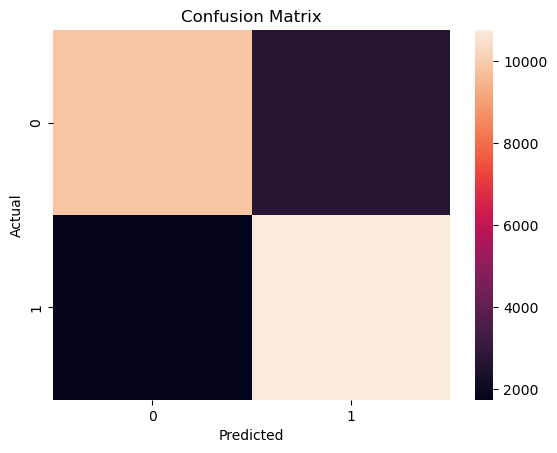

In [34]:
sns.heatmap(confusion)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()